In [15]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/churn_prediction.csv")

# Display the first few rows
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check dataset structure
print(df.info())
print(df.describe())

print(df.shape)
print(df.dtypes)

# Check missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

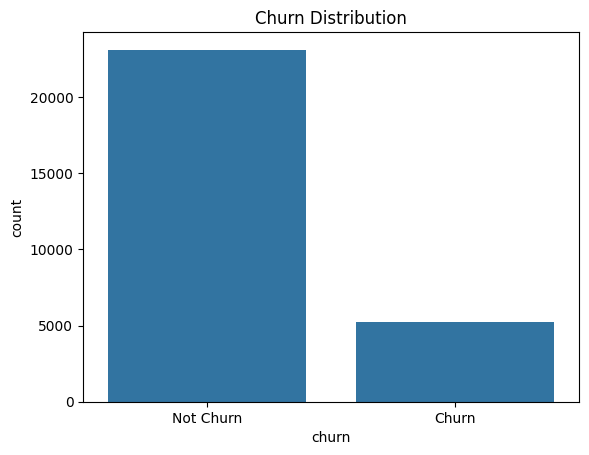

In [17]:
# churn_counts = df['churn'].value_counts()
# total_samples = len(df['churn'])

# sns.barplot(x=churn_counts.index, y=churn_counts.values)
# plt.title('Churn Statistic')
# plt.xlabel('Churn')
# plt.ylabel('Count')

# for index, value in enumerate(churn_counts):
#     plt.text(index, value + 100, f'{value} ({value / total_samples * 100:.2f}%)', ha='center', va='bottom')

# plt.xticks(ticks=[0, 1], labels=['Not Churn', 'Churn'])
# plt.show()

# Visualize churn distribution
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.xticks(ticks=[0, 1], labels=['Not Churn', 'Churn'])
plt.show()

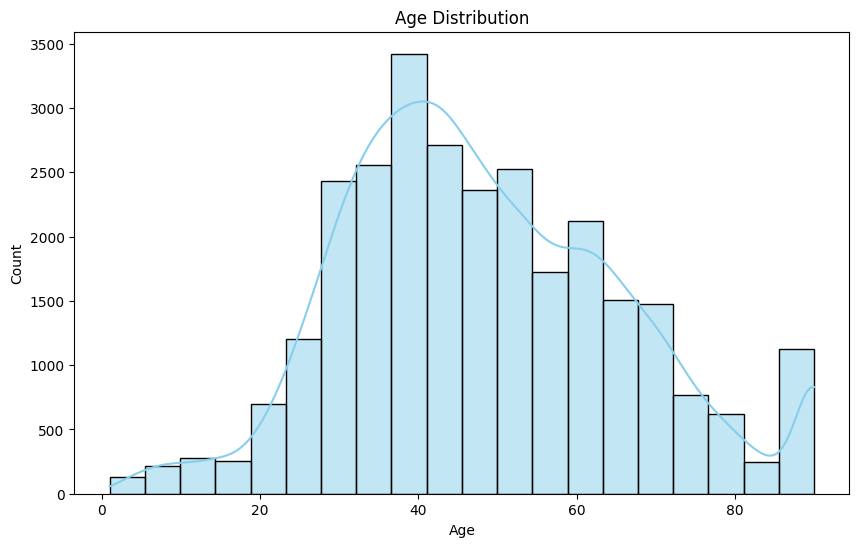

In [25]:
# Age distribution visualization

age_counts = df['age']
plt.figure(figsize=(10, 6))
sns.histplot(age_counts, bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Count')
total_samples = len(age_counts)
plt.show()

In [26]:
# Gender statistic

print(df['gender'].value_counts(dropna=False))


missing_gender_percentage = df['gender'].isnull().sum() / len(df) * 100
print(f"Percentage of missing values in 'gender': {missing_gender_percentage:.2f}%")

gender
Male      16548
Female    11309
NaN         525
Name: count, dtype: int64
Percentage of missing values in 'gender': 1.85%


In [27]:
# Replace missing values with 'Unknown'

df['gender'].fillna('Unknown', inplace=True)
print(df['gender'].value_counts(dropna=False))

gender
Male       16548
Female     11309
Unknown      525
Name: count, dtype: int64


<ipython-input-27-a98c9a700d47>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna('Unknown', inplace=True)


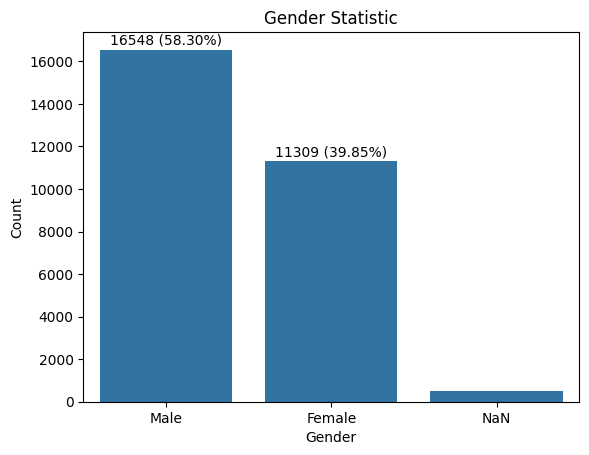

In [28]:
# Gender visualization

gender_counts = df['gender'].value_counts(dropna=False)
total_samples = len(df['gender'])

sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Statistic')
plt.xlabel('Gender')
plt.ylabel('Count')

for index, value in enumerate(gender_counts):
    if index == 2:  # To avoid placing label for NaN values
        continue
    plt.text(index, value + 100, f'{value} ({value / total_samples * 100:.2f}%)', ha='center', va='bottom')

plt.xticks(ticks=[0, 1, 2], labels=['Male', 'Female', 'NaN'])
plt.show()

In [30]:
print(df['dependents'].unique())

[ 0. nan  2.  3.  1.  7.  4.  6.  5.  9. 52. 36. 50.  8. 25. 32.]


In [31]:
# Dependents – find outliers

high_dependents = df[df['dependents'] > 10]
count_high_dependents = len(high_dependents)
print(f"The number of cases with more than 10 dependents: {count_high_dependents}")

The number of cases with more than 10 dependents: 5


In [32]:
# imputation with median

median_dependents = df[df['dependents'] <= 10]['dependents'].median()

df.loc[df['dependents'] > 10, 'dependents'] = median_dependents

df['dependents'].fillna(median_dependents, inplace=True)


print(df['dependents'].isnull().sum())
print(len(df[df['dependents'] > 10]))

0
0


<ipython-input-32-47073818baea>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dependents'].fillna(median_dependents, inplace=True)


In [33]:
# Occupation – statistic

print(df['occupation'].value_counts(dropna=False))

occupation
self_employed    17476
salaried          6704
student           2058
retired           2024
NaN                 80
company             40
Name: count, dtype: int64


In [34]:
# Occupation – handle with missing values - replace missing values with 'Unknown'

df['occupation'].fillna('Unknown', inplace=True)

print(df['occupation'].value_counts(dropna=False))

occupation
self_employed    17476
salaried          6704
student           2058
retired           2024
Unknown             80
company             40
Name: count, dtype: int64


<ipython-input-34-425d7abd17ef>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].fillna('Unknown', inplace=True)


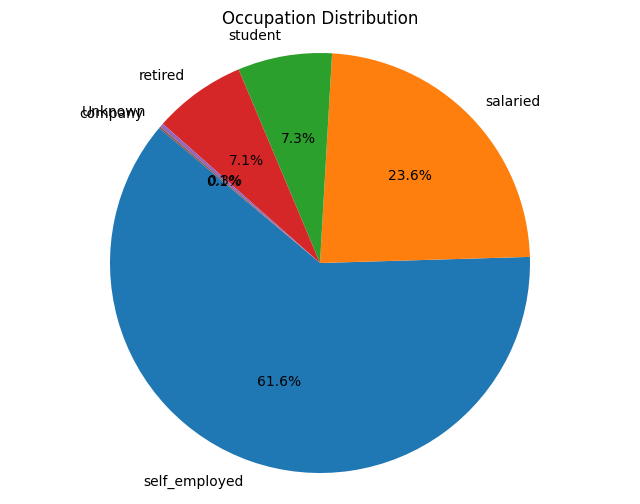

In [35]:
# Occupation – visualization

occupation_counts = df['occupation'].value_counts(dropna=False)
plt.figure(figsize=(8, 6))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Occupation Distribution')
plt.axis('equal')
plt.show()

In [36]:
# City – statistic

print(df['city'].value_counts(dropna=False))

city
1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
748.0        1
1099.0       1
108.0        1
655.0        1
723.0        1
Name: count, Length: 1605, dtype: int64


In [37]:
# City – handle with missing values – replace with ’Unknown’

df['city'].fillna('Unknown', inplace=True)

print(df['city'].value_counts(dropna=False))

city
1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
748.0        1
1099.0       1
108.0        1
655.0        1
723.0        1
Name: count, Length: 1605, dtype: int64


<ipython-input-37-db9082b59469>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['city'].fillna('Unknown', inplace=True)
<ipython-input-37-db9082b59469>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['city'].fillna('Unknown', inplace=True)


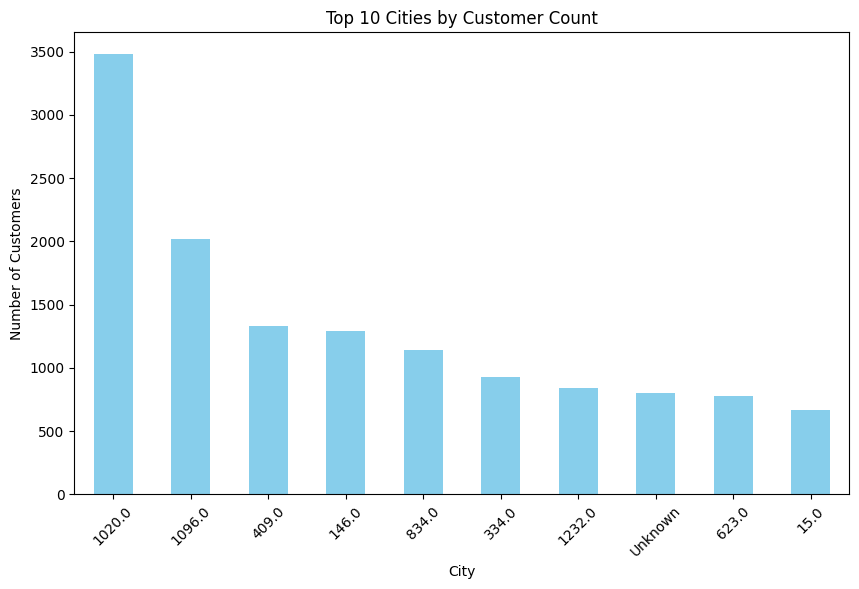

In [38]:
# City -  visualization customer count

top_ten_cities = df['city'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_ten_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Customer Count')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

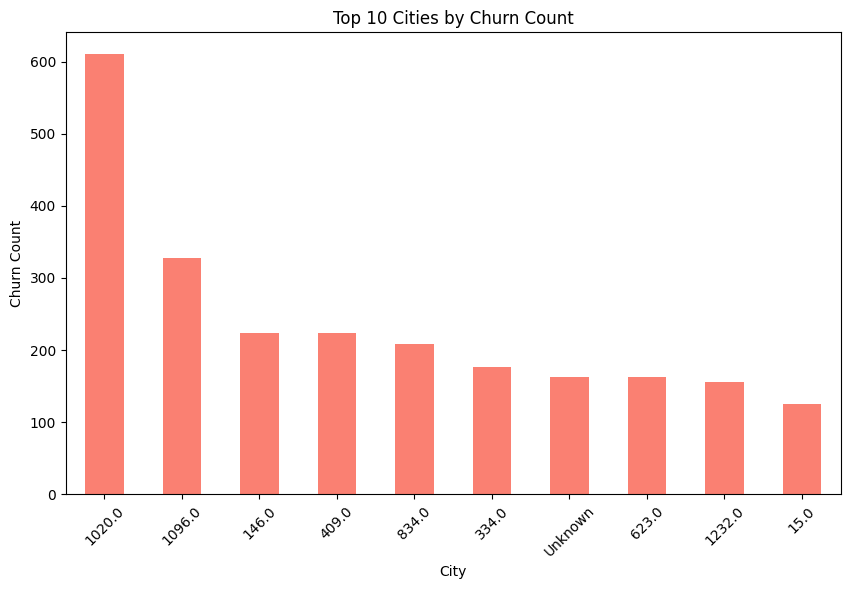

In [39]:
# City -  visualization churn

top_ten_cities_churn = df[df['churn'] == 1]['city'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_ten_cities_churn.plot(kind='bar', color='salmon')
plt.title('Top 10 Cities by Churn Count')
plt.xlabel('City')
plt.ylabel('Churn Count')
plt.xticks(rotation=45)
plt.show()

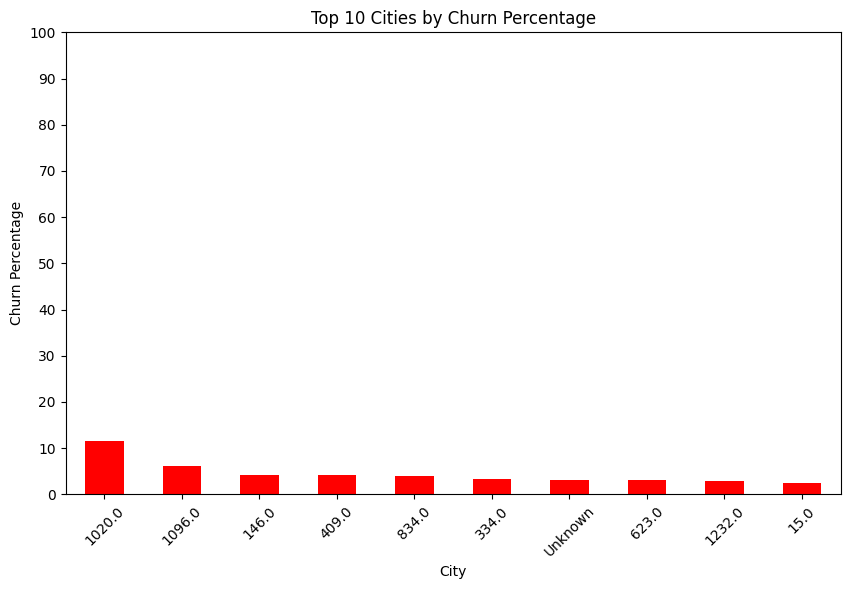

In [40]:
# City -  visualization churn percentage

total_churned = df['churn'].sum()
top_ten_cities_churn = df[df['churn'] == 1]['city'].value_counts(normalize=True).nlargest(10) * 100

plt.figure(figsize=(10, 6))
top_ten_cities_churn.plot(kind='bar', color='red')
plt.title('Top 10 Cities by Churn Percentage')
plt.xlabel('City')
plt.ylabel('Churn Percentage')
plt.xticks(rotation=45)
plt.yticks(range(0, 101, 10))
plt.show()

In [41]:
print(df['customer_nw_category'].value_counts())

customer_nw_category
2    14559
3    10112
1     3711
Name: count, dtype: int64


In [42]:
# correlation between 'customer_nw_category' and 'current_balance'

correlation = df['customer_nw_category'].corr(df['current_balance'])
print(f"Correlation between customer_nw_category and current_balance: {correlation}")

Correlation between customer_nw_category and current_balance: -0.05831381741917238


In [43]:
# correlation between 'customer_nw_category' and 'churn'

correlation_churn_nw = df['customer_nw_category'].corr(df['churn'])
print(f"Correlation between customer_nw_category and churn: {correlation_churn_nw}")

Correlation between customer_nw_category and churn: 0.006550631801994323


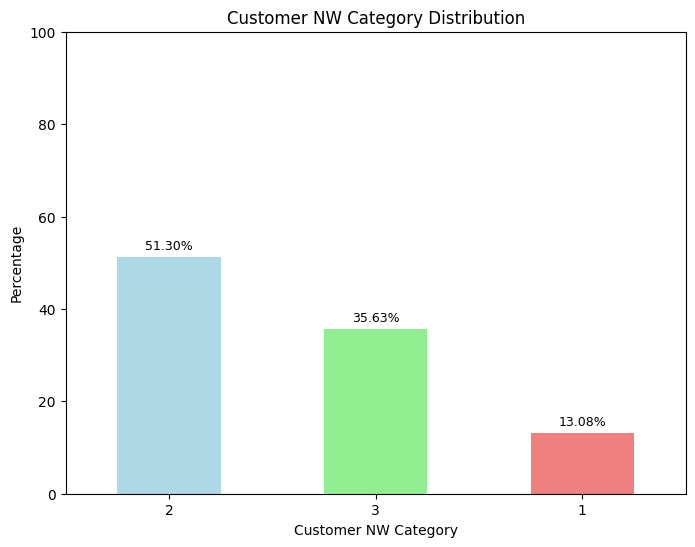

In [44]:
# Visualization

category_counts = df['customer_nw_category'].value_counts()

category_percentages = (category_counts / category_counts.sum()) * 100

colors = ['lightblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
category_percentages.plot(kind='bar', color=colors)
plt.title('Customer NW Category Distribution')
plt.xlabel('Customer NW Category')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.ylim(0, 100)
for i, value in enumerate(category_percentages):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', va='bottom', fontsize=9)
plt.show()


<ipython-input-45-be065b131fb0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_category.index, y=churn_by_category.values, palette='viridis')


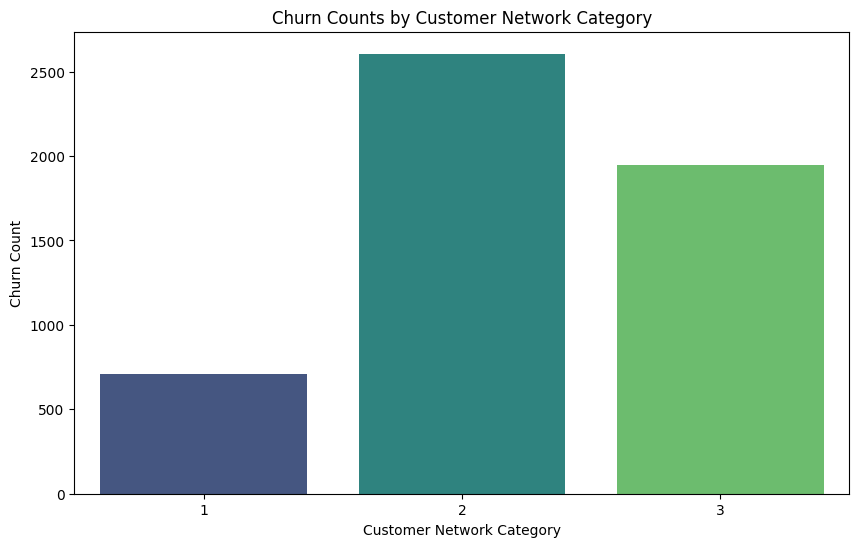

In [45]:
# relation with churn

churned_data = df[df['churn'] == 1]

churn_by_category = churned_data['customer_nw_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_category.index, y=churn_by_category.values, palette='viridis')

plt.title('Churn Counts by Customer Network Category')
plt.xlabel('Customer Network Category')
plt.ylabel('Churn Count')
plt.xticks(rotation=0)

plt.show()


In [46]:
# Converting ‘last transaction’ into days since last transaction

df['last_transaction'] = pd.to_datetime(df['last_transaction'])

current_date = pd.to_datetime('today')
df['days_since_last_transaction'] = (current_date - df['last_transaction']).dt.days

print(df[['customer_id', 'last_transaction', 'days_since_last_transaction']].head())

   customer_id last_transaction  days_since_last_transaction
0            1       2019-05-21                       2110.0
1            2       2019-11-01                       1946.0
2            4              NaT                          NaN
3            5       2019-08-06                       2033.0
4            6       2019-11-03                       1944.0


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,days_since_last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21,2110.0
1,2,2348,35,Male,0.0,self_employed,Unknown,2,3214,5390.37,...,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01,1946.0
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT,NaN
3,5,2329,90,Unknown,0.0,self_employed,1020.0,2,582,2291.91,...,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06,2033.0
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03,1944.0


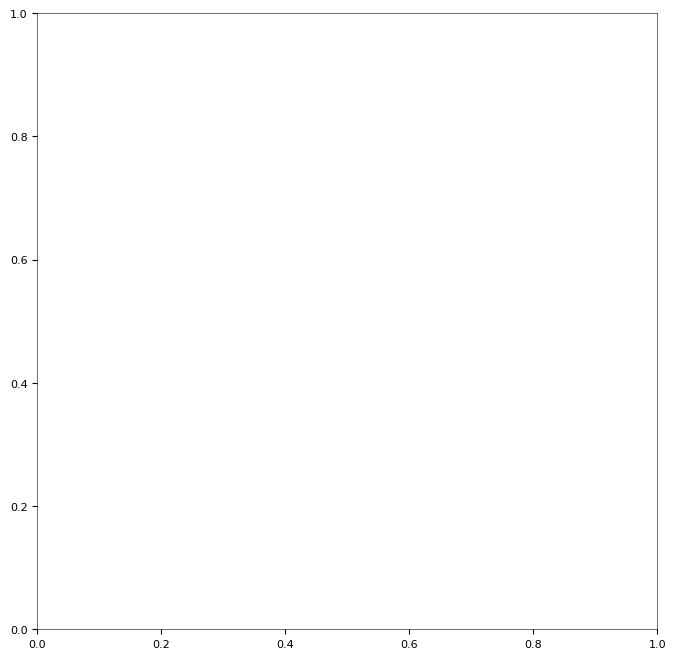

In [48]:
# check

df.head()

In [50]:
#  missing values in 'days_since_last_transaction'

missing_values_count = df['days_since_last_transaction'].isnull().sum()
print(f"Number of missing values in 'days_since_last_transaction': {missing_values_count}")


Number of missing values in 'days_since_last_transaction': 3223


In [51]:
# Impute missing values with the mean

mean_days = df['days_since_last_transaction'].mean()
df['days_since_last_transaction'].fillna(mean_days, inplace=True)

<ipython-input-51-509c242be5ae>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_since_last_transaction'].fillna(mean_days, inplace=True)


In [52]:
#  percentage change in balances

df['percentage_change_balance'] = ((df['current_month_balance'] -
                                      df['previous_month_balance']) /
                                      df['previous_month_balance']) * 100

In [53]:
# total credit and debit amounts for each customer

df['total_credit'] = df['current_month_credit'] + df['previous_month_credit']
df['total_debit'] = df['current_month_debit'] + df['previous_month_debit']

# credit-to-debit ratio

df['credit_to_debit_ratio'] = df['total_credit'] / df['total_debit']

In [54]:
df['savings_ratio'] = df['current_month_balance'] / df['previous_month_balance']

In [55]:
# Exploring customer id to understand if there is more transaction
# of one customer but the category contains only unique values.

customer_id_counts = df['customer_id'].value_counts()
print(customer_id_counts)

customer_id
1        1
20194    1
20206    1
20205    1
20204    1
        ..
10090    1
10089    1
10088    1
10087    1
30301    1
Name: count, Length: 28382, dtype: int64


In [61]:
df['credit_to_balance_ratio'] = df['current_month_credit'] / df['current_month_balance']

In [62]:
# Percentage Balance Change Q1 to Q2
df['balance_change_Q1_to_Q2'] = df['average_monthly_balance_prevQ'] - df['average_monthly_balance_prevQ2']

In [63]:
df['percentage_balance_change_Q1_to_Q2'] = ((df['average_monthly_balance_prevQ'] - df['average_monthly_balance_prevQ2']) / df['average_monthly_balance_prevQ2']) * 100

In [64]:
# Balance Change Q1 to Q2

df['balance_comparison_Q1_to_current'] = df['current_month_balance'] - df['average_monthly_balance_prevQ']

df['balance_comparison_Q2_to_current'] = df['current_month_balance'] - df['average_monthly_balance_prevQ2']

In [65]:
# data with newly engineered features

print(df[['balance_change_Q1_to_Q2', 'percentage_balance_change_Q1_to_Q2',
            'balance_comparison_Q1_to_current', 'balance_comparison_Q2_to_current']].head())

   balance_change_Q1_to_Q2  percentage_balance_change_Q1_to_Q2  \
0                     9.64                            0.665254   
1                 -4620.15                          -37.201043   
2                  2094.23                           74.370548   
3                  1078.00                          107.099569   
4                  -227.81                          -12.175061   

   balance_comparison_Q1_to_current  balance_comparison_Q2_to_current  
0                              0.00                              9.64  
1                          -1302.48                          -5922.63  
2                             96.11                           2190.34  
3                            207.37                           1285.37  
4                           -486.16                           -713.97  


In [66]:
#  all  features
print(df.head())

   customer_id  vintage  age   gender  dependents     occupation     city  \
0            1     2101   66     Male         0.0  self_employed    187.0   
1            2     2348   35     Male         0.0  self_employed  Unknown   
2            4     2194   31     Male         0.0       salaried    146.0   
3            5     2329   90  Unknown         0.0  self_employed   1020.0   
4            6     1579   42     Male         2.0  self_employed   1494.0   

   customer_nw_category  branch_code  current_balance  ...  \
0                     2          755          1458.71  ...   
1                     2         3214          5390.37  ...   
2                     2           41          3913.16  ...   
3                     2          582          2291.91  ...   
4                     3          388           927.72  ...   

   percentage_change_balance  total_credit  total_debit  \
0                   0.000000          0.40         0.40   
1                 -26.068863          1.12    

In [67]:
# check
print(df.dtypes)

customer_id                                    int64
vintage                                        int64
age                                            int64
gender                                        object
dependents                                   float64
occupation                                    object
city                                          object
customer_nw_category                           int64
branch_code                                    int64
current_balance                              float64
previous_month_end_balance                   float64
average_monthly_balance_prevQ                float64
average_monthly_balance_prevQ2               float64
current_month_credit                         float64
previous_month_credit                        float64
current_month_debit                          float64
previous_month_debit                         float64
current_month_balance                        float64
previous_month_balance                       f

In [68]:
# Encoding categories ‘gender’ and ‘occupation’ with one hot encoding due to low cardinality.

data_encoded = pd.get_dummies(df, columns=['gender', 'occupation'], drop_first=True)

In [69]:
# Frequency encoding to ‘city’ category due to high cardinality

city_freq = df['city'].value_counts(normalize=True)
data_encoded['city_freq_encoded'] = df['city'].map(city_freq)

In [70]:
columns_to_drop = [ 'city']
data_encoded.drop(columns_to_drop, axis=1, inplace=True)

In [71]:
# Impute missing values with the mean or median
mean_days = df['days_since_last_transaction'].mean()
median_days = df['days_since_last_transaction'].median()

# Replace missing values with the mean
df['days_since_last_transaction'].fillna(mean_days, inplace=True)
# Or replace with the median
# df['days_since_last_transaction'].fillna(median_days, inplace=True)

<ipython-input-71-d887adfe6519>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_since_last_transaction'].fillna(mean_days, inplace=True)


In [72]:
# Drop the original 'last_transaction' column

columns_to_drop = [ 'last_transaction']
data_encoded.drop(columns_to_drop, axis=1, inplace=True)

In [73]:
# Train test split
from sklearn.model_selection import train_test_split


X = data_encoded.drop('churn', axis=1)  # Features
y = data_encoded['churn']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Check
print(X_train.dtypes)
print(X_test.dtypes)

customer_id                             int64
vintage                                 int64
age                                     int64
dependents                            float64
customer_nw_category                    int64
branch_code                             int64
current_balance                       float64
previous_month_end_balance            float64
average_monthly_balance_prevQ         float64
average_monthly_balance_prevQ2        float64
current_month_credit                  float64
previous_month_credit                 float64
current_month_debit                   float64
previous_month_debit                  float64
current_month_balance                 float64
previous_month_balance                float64
days_since_last_transaction           float64
percentage_change_balance             float64
total_credit                          float64
total_debit                           float64
credit_to_debit_ratio                 float64
savings_ratio                     

In [75]:
# Models
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_model = LogisticRegression(max_iter=1000)

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.83
Confusion Matrix:
[[4605   34]
 [ 940   98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      4639
           1       0.74      0.09      0.17      1038

    accuracy                           0.83      5677
   macro avg       0.79      0.54      0.54      5677
weighted avg       0.81      0.83      0.77      5677



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
accuracy_scores = {}
precision_churn = {}
recall_churn={}
f1_churn={}

In [77]:
# Add results to dictionary in order to visualize

accuracy_scores['Logistic Regression']= 0.83
precision_churn['Logistic Regression'] = 0.76
recall_churn['Logistic Regression']= 0.10
f1_churn['Logistic Regression']= 0.17

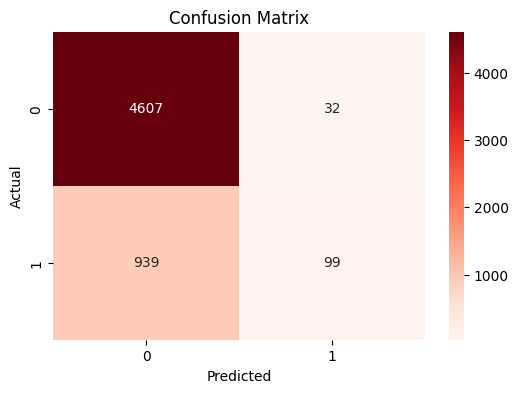

In [78]:
# Visualisation


from sklearn.metrics import confusion_matrix

# Your confusion matrix values
tn, fp, fn, tp = 4607, 32, 939, 99
cm = [[tn, fp], [fn, tp]]

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [80]:
# Feature importances

coefficients = abs(logistic_model.coef_[0])
feature_importance_logistic = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
})
feature_importance_logistic = feature_importance_logistic.sort_values(by='Importance', ascending=False)
print(feature_importance_logistic)

                               Feature    Importance
16         days_since_last_transaction  8.783238e-04
2                                  age  5.493823e-04
22             credit_to_balance_ratio  4.284129e-04
6                      current_balance  2.100491e-04
5                          branch_code  1.177525e-04
8        average_monthly_balance_prevQ  1.036464e-04
1                              vintage  7.762949e-05
23             balance_change_Q1_to_Q2  5.485398e-05
14               current_month_balance  5.339589e-05
25    balance_comparison_Q1_to_current  5.025055e-05
9       average_monthly_balance_prevQ2  4.879246e-05
3                           dependents  3.883518e-05
15              previous_month_balance  3.135309e-05
32            occupation_self_employed  2.802708e-05
4                 customer_nw_category  2.306127e-05
27                         gender_Male  1.724736e-05
30                  occupation_retired  9.844643e-06
31                 occupation_salaried  9.2174

In [81]:
# Random forest

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8682402677470495
[[4467  172]
 [ 576  462]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4639
           1       0.73      0.45      0.55      1038

    accuracy                           0.87      5677
   macro avg       0.81      0.70      0.74      5677
weighted avg       0.86      0.87      0.86      5677



In [82]:
# Add results to dictionary in order to visualize

accuracy_scores['Random forest']= 0.869
precision_churn['Random forest'] = 0.73
recall_churn['Random forest']= 0.45
f1_churn['Random forest']= 0.56

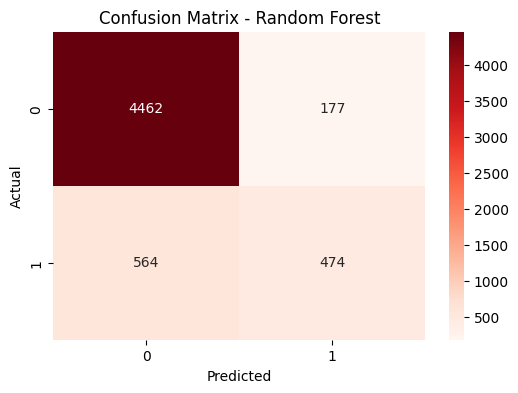

In [83]:
# Visualisation

tn_rf, fp_rf, fn_rf, tp_rf = 4462, 177, 564, 474
cm_rf = [[tn_rf, fp_rf], [fn_rf, tp_rf]]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [84]:
# Feature importances

feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest.feature_importances_
})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print(feature_importance_rf)

                               Feature  Importance
6                      current_balance    0.104634
21                       savings_ratio    0.083221
25    balance_comparison_Q1_to_current    0.067308
17           percentage_change_balance    0.058037
14               current_month_balance    0.048661
19                         total_debit    0.039200
12                 current_month_debit    0.037407
24  percentage_balance_change_Q1_to_Q2    0.036995
23             balance_change_Q1_to_Q2    0.033400
26    balance_comparison_Q2_to_current    0.031496
7           previous_month_end_balance    0.030962
9       average_monthly_balance_prevQ2    0.030153
8        average_monthly_balance_prevQ    0.029594
15              previous_month_balance    0.028917
13                previous_month_debit    0.028744
5                          branch_code    0.028672
1                              vintage    0.027844
0                          customer_id    0.027777
20               credit_to_debi

In [85]:
# GradientBoost

from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()

gradient_boosting.fit(X_train, y_train)

y_pred_gb = gradient_boosting.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy_gb:.5f}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.86842
[[4467  172]
 [ 576  462]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4639
           1       0.73      0.45      0.55      1038

    accuracy                           0.87      5677
   macro avg       0.81      0.70      0.74      5677
weighted avg       0.86      0.87      0.86      5677



In [86]:
# Add results to dictionary in order to visualize

accuracy_scores['Gradient boosting']= 0.867
precision_churn['Gradient boosting'] = 0.73
recall_churn['Gradient boosting']= 0.45
f1_churn['Gradient boosting']= 0.56

In [88]:
# XGBoost

from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.5f}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.86067
[[4467  172]
 [ 576  462]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4639
           1       0.73      0.45      0.55      1038

    accuracy                           0.87      5677
   macro avg       0.81      0.70      0.74      5677
weighted avg       0.86      0.87      0.86      5677



In [89]:
# Add results to dictionary in order to visualize

accuracy_scores['XGBoost']= 0.8607
precision_churn['XGBoost'] = 0.73
recall_churn['XGBoost']= 0.45
f1_churn['XGBoost']= 0.56

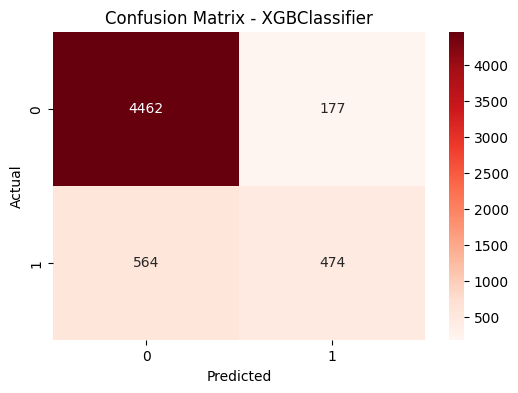

In [90]:
# Visualisation

tn_xgb, fp_xgb, fn_xgb, tp_xgb = 4462, 177, 564, 474
cm_xgb = [[tn_xgb, fp_xgb], [fn_xgb, tp_xgb]]


plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBClassifier')
plt.show()

In [91]:
# Feature importances

xgb_classifier.fit(X_train, y_train)
importance = xgb_classifier.get_booster().get_score(importance_type='weight')
feature_importance_xgb = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
})
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)
print(feature_importance_xgb)

                               Feature  Importance
0                          customer_id       309.0
5                          branch_code       286.0
1                              vintage       271.0
6                      current_balance       248.0
2                                  age       216.0
24    balance_comparison_Q1_to_current       214.0
33                   city_freq_encoded       211.0
13                previous_month_debit       195.0
17           percentage_change_balance       183.0
12                 current_month_debit       182.0
8        average_monthly_balance_prevQ       181.0
23  percentage_balance_change_Q1_to_Q2       175.0
11               previous_month_credit       172.0
16         days_since_last_transaction       171.0
7           previous_month_end_balance       165.0
20               credit_to_debit_ratio       156.0
21             credit_to_balance_ratio       154.0
9       average_monthly_balance_prevQ2       150.0
19                         tota

In [92]:
# XGBoost with GridSearchCV

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier()

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Score: 0.8668575203699624
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4639
           1       0.73      0.45      0.55      1038

    accuracy                           0.87      5677
   macro avg       0.81      0.70      0.74      5677
weighted avg       0.86      0.87      0.86      5677



In [93]:
# Add results to dictionary in order to visualize

accuracy_scores['XGBoost grid']= 0.8669
precision_churn['XGBoost grid'] = 0.44
recall_churn['XGBoost grid']= 0.47
f1_churn['XGBoost grid']= 0.45

In [94]:
# LightGBM classifier

from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

[LightGBM] [Info] Number of positive: 4222, number of negative: 18483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6330
[LightGBM] [Info] Number of data points in the train set: 22705, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.185950 -> initscore=-1.476542
[LightGBM] [Info] Start training from score -1.476542
Accuracy: 0.8663026246256825
Confusion Matrix:
[[4449  190]
 [ 569  469]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4639
           1       0.71      0.45      0.55      1038

    accuracy                           0.87      5677
   macro avg       0.80      0.71      0.74      5677
weighted avg       0.85      0.87      0.85      5677



In [95]:
accuracy_scores['LightGBM']= 0.865
precision_churn['LightGBM'] = 0.70
recall_churn['LightGBM']= 0.46
f1_churn['LightGBM']= 0.55

In [96]:
# Feature importances

importance = lgbm.feature_importances_
feature_importance_lgbm = pd.DataFrame({
    'Feature': lgbm.feature_name_,
    'Importance': importance
})
feature_importance_lgbm = feature_importance_lgbm.sort_values(by='Importance', ascending=False)
print(feature_importance_lgbm)

                               Feature  Importance
6                      current_balance         258
1                              vintage         172
5                          branch_code         163
0                          customer_id         145
25    balance_comparison_Q1_to_current         140
12                 current_month_debit         133
8        average_monthly_balance_prevQ         129
9       average_monthly_balance_prevQ2         124
24  percentage_balance_change_Q1_to_Q2         122
2                                  age         120
23             balance_change_Q1_to_Q2         115
34                   city_freq_encoded         113
7           previous_month_end_balance         113
22             credit_to_balance_ratio         105
26    balance_comparison_Q2_to_current          96
19                         total_debit          95
16         days_since_last_transaction          92
13                previous_month_debit          91
11               previous_month

In [99]:
# Adaptive boosting Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

adaboost_classifier = AdaBoostClassifier()

adaboost_classifier.fit(X_train, y_train)

y_pred_adaboost = adaboost_classifier.predict(X_test)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"Accuracy: {accuracy_adaboost}")

conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
print("Confusion Matrix:")
print(conf_matrix_adaboost)

classification_rep_adaboost = classification_report(y_test, y_pred_adaboost)
print("Classification Report:")
print(classification_rep_adaboost)

Accuracy: 0.857847454641536
Confusion Matrix:
[[4455  184]
 [ 623  415]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4639
           1       0.69      0.40      0.51      1038

    accuracy                           0.86      5677
   macro avg       0.79      0.68      0.71      5677
weighted avg       0.84      0.86      0.84      5677



In [102]:
accuracy_scores['AdaBoost']= 0.857
precision_churn['AdaBoost'] = 0.69
recall_churn['AdaBoost']= 0.40
f1_churn['AdaBoost']= 0.51

In [103]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.80
Confusion Matrix:
[[4026  613]
 [ 549  489]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4639
           1       0.44      0.47      0.46      1038

    accuracy                           0.80      5677
   macro avg       0.66      0.67      0.67      5677
weighted avg       0.80      0.80      0.80      5677



In [104]:
# Add results to dictionary in order to visualize

accuracy_scores['DecisionTree']= 0.80
precision_churn['DecisionTree'] = 0.45
recall_churn['DecisionTree']= 0.47
f1_churn['DecisionTree']= 0.46

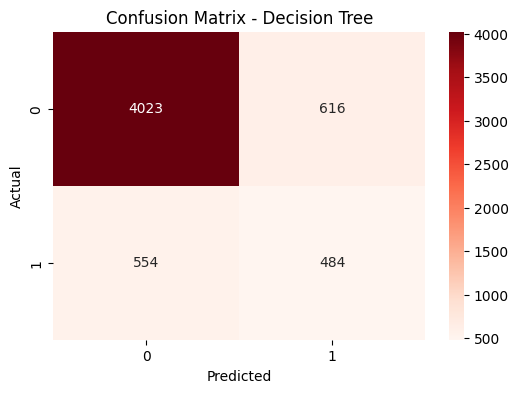

In [105]:
# Visualisation

tn_dt, fp_dt, fn_dt, tp_dt = 4023, 616, 554, 484
cm_dt = [[tn_dt, fp_dt], [fn_dt, tp_dt]]

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [106]:
from functools import reduce

accuracy_df = pd.DataFrame(accuracy_scores.items(), columns=['Model', 'Accuracy'])
precision_df = pd.DataFrame(precision_churn.items(), columns=['Model', 'Precision on churn'])
recall_df = pd.DataFrame(recall_churn.items(), columns=['Model', 'Recall on churn'])
f1_df = pd.DataFrame(f1_churn.items(), columns=['Model', 'F1 on churn'])

dfs = [accuracy_df, precision_df, recall_df, f1_df]
result_table = reduce(lambda left, right: pd.merge(left, right, on='Model'), dfs)

print(result_table)

                 Model  Accuracy  Precision on churn  Recall on churn  \
0  Logistic Regression    0.8300                0.76             0.10   
1        Random forest    0.8690                0.73             0.45   
2    Gradient boosting    0.8670                0.73             0.45   
3              XGBoost    0.8607                0.73             0.45   
4         XGBoost grid    0.8669                0.44             0.47   
5             LightGBM    0.8650                0.70             0.46   
6             AdaBoost    0.8570                0.69             0.40   
7         DecisionTree    0.8000                0.45             0.47   

   F1 on churn  
0         0.17  
1         0.56  
2         0.56  
3         0.56  
4         0.45  
5         0.55  
6         0.51  
7         0.46  


In [107]:
result_table = result_table.sort_values(by='Accuracy', ascending=False)
print(result_table)

                 Model  Accuracy  Precision on churn  Recall on churn  \
1        Random forest    0.8690                0.73             0.45   
2    Gradient boosting    0.8670                0.73             0.45   
4         XGBoost grid    0.8669                0.44             0.47   
5             LightGBM    0.8650                0.70             0.46   
3              XGBoost    0.8607                0.73             0.45   
6             AdaBoost    0.8570                0.69             0.40   
0  Logistic Regression    0.8300                0.76             0.10   
7         DecisionTree    0.8000                0.45             0.47   

   F1 on churn  
1         0.56  
2         0.56  
4         0.45  
5         0.55  
3         0.56  
6         0.51  
0         0.17  
7         0.46  


Final Results

Recall on churn is our target value because this is most important to be identify. The models with high values are:

XGBClassifier with GridSearchCV – 0.47
DecisionTree – 0.47

Conclusion

The results are similar. There is one model with high accuracy but it fails to achieve high recall on churn. The most important is to achieve high result on recall on churn in order to identify clients with signs of leaving the bank. In my opinion we do not have enough information about customers behavior to have a good model to have acceptable results. Our model fail to achieve good enough result in order to identify churn customers.

Further Improvements

If this is our work, we need more information for the client’s behavior. Especially client dynamic behavior. For example:


*   Transaction count of different periods, Qs, months – tendences, changes

*   Turnovers – debit, credit - tendences, changes

*   CSI – changes – cross sell index/how many products of a bank the client uses/

*   Last time the client visited a bank branch

*   Last time the client visited a point of service – call center, online banking, mobile banking, ATM

*   How often client visited a branch – changes over a period

*   How often client visited a point of service – call center, online banking, mobile banking, ATM

*   Complains

*   Request for loans – approvals, rejections, dates

*   Request for service – debit card, credit card, online banking, insurance, pension fund

*   Problems with services – rejected transactions, problem with cards


*   Interaction with employees






Real-world Application

This exact model could not be implemented on Real-world Application because of its low recall on churn. On the other hand, the model could be improved with more features in order to achieve higher results. Then it could be implemented in bank in their Customer Value Management systems to identify the client ready to leave on different period basis. The clients could be contacted with offers or solutions of their problems in order to stay and achieve lower churn rate.